Forest Change In the Aberdares and its impact on air quality based Nitrogen Dioxide Levels
===

Forests play a critical role in maintaining ecological balance and air quality. The Aberdare Forest which is one of the main forests in Kenya,is the focus of this analysis.The forest changes between 2018 and 2024 are examined in the subsequent sections.The analysis will also look at how the air quality in the perspective of atmospheric Nitrogen Dioxide levels in the area responds in relation to the recorded change.

The methodology used involves selecting Sentinel 2 Level 2A images at three year intervals from 2018 to 2024 i.e 2018 , 2021 and 2024. The images were taken around the same time which is between 17th February and 27th 
February when the cloud cover is minimal.
The next step is to perform land cover classification to identify the forest extents, due to the complexity of collecting ground data to train models which may be time consuming especially for large 
datasets we used the sen2classification library in python. The library is designed for automatic land cover classification of Sentinel 2 images using machine learning. The library computes vegetation indices such as
NDVI, BAEI, AWEI and NDTI for thresholding and uses either ALCC or gradient boosting. The output classes are as follows;
            0 = no data
            1 = water
            2 = low vegetation
            3 = high vegetation
            4 = soil
            5 = built up
For more information visit the __[PyPi website](https://pypi.org/project/sen2classification/)__

The space requirements of running the algorithm in the Dunia platform was not possible hence,it had to be done run on the local computer environment. This __[notebook](https://github.com/ivybart/GMES_Forest_Change)__ shows how to use the sen2classification library is used to 
obtain the classified images. For those with enough space running the same code in the Dunia platform works too. Let's get started!!

## Forest Change Analysis

The 'rasterio' package in Python is designed for reading, writing, and manipulating raster data.
The 'numPy'is a Numerical Python library widely used for scientific computing.
The 'matplolib' is used for plotting static, animated, and interactive visualizations
The 'os' module is operating system used to handle directory and file operations, such as reading, writing,and modifying     file attributes,along with fetching environment information and managing processes.
The 'ListedColormap' is a tool for creating colormaps from a list of specified colors.
The 'matplotlib.patches' module in Python is a Matplotlib library used to provides classes for drawing various shapes and       patches on Matplotlib figures.
The 'rasterstats' module  provides a simple API for zonal statistics, raster summarization,geoprocessing across      geographic areas which involves raster datasets.

In [ ]:
## Install the rasterstats package to be used in doing pixel count and area calculations
#!pip install rasterstats
#! pip install scikit-image

In [4]:
# import required packages
import rasterio 
import numpy as np
import matplotlib.pyplot as plt
import os
from matplotlib.colors import ListedColormap
from matplotlib.patches import Patch
import geopandas as gpd
from skimage.measure import label, regionprops
from skimage.color import label2rgb

Defining the directories for the input image and the output file paths.

### Creating a list of imaged dictironaries that holds the paths for input and output directories for each image to be used in the processing.



In [5]:
# A list for the input and output directories
image_directories = [
    ("data_raw/input", "data_raw/output"),
    ("data_raw/input", "data_raw/output"),
    ("data_raw/input", "data_raw/output"),
]


### The following code creates a binary image to classify the image into forest and non-forest, by assigning forest as value 1 and all the other classes a value of 0.


In [6]:
def create_forest_binary_image(input_tiff, output_tiff):
    # Opening the input TIFF file
    with rasterio.open(input_tiff) as src:
        # Reading the data from the TIFF file
        data = src.read(1)  # Reading the first band 
        
        # Create a binary image: 1 for forest, 0 for non-forests
        binary_forest = np.where(data == 3, 1, 0)
        
        # Define the metadata for the output file
        meta = src.meta.copy()
        meta.update(dtype=rasterio.uint8, count=1)
        
        # Write the binary image to the output TIFF file
        with rasterio.open(output_tiff, 'w', **meta) as dst:
            dst.write(binary_forest.astype(rasterio.uint8), 1)
    
    print(f"Binary forest image saved to {output_tiff}")

def process_images(years, input_dir, output_dir):
    for year in years:
        input_tiff = os.path.join(input_dir, f'{year}_LULC.tif')
        output_tiff = os.path.join(output_dir, f'{year}_binary_forest.tif')
        
        if os.path.exists(input_tiff):
            create_forest_binary_image(input_tiff, output_tiff)
        else:
            print(f"Input file for year {year} not found: {input_tiff}")

# Define the years to process
years = [2018, 2021, 2024]

# Define the input directory containing the TIFF files
input_dir = 'data_raw/input'

# Define the output directory to save the binary images
output_dir = 'data_raw/output'
os.makedirs(output_dir, exist_ok=True)

# Process the images
process_images(years, input_dir, output_dir)

Binary forest image saved to data_raw/output\2018_binary_forest.tif
Binary forest image saved to data_raw/output\2021_binary_forest.tif
Binary forest image saved to data_raw/output\2024_binary_forest.tif


### A code to open the binary image created, read the data from the 'Tif' file, and display the binary image.

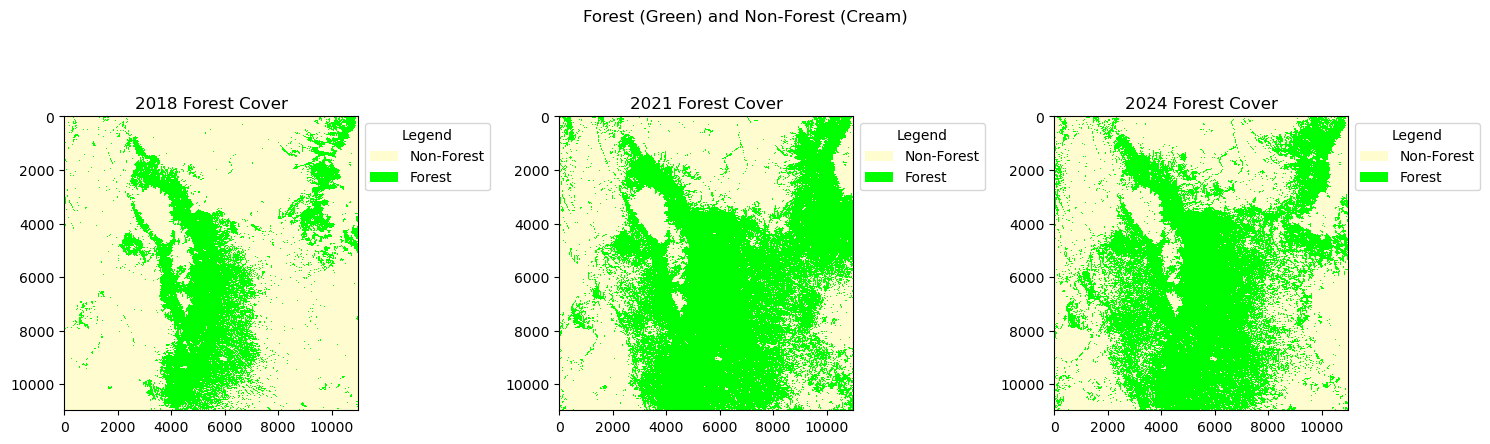

In [7]:
def display_binary_images(image_files, titles):
    # Defining the colors for forest (green) and non-forest (cream)
    cmap = ListedColormap(['#FFFDD0', '#00FF00']) 

    # Create a subplot grid
    fig, axs = plt.subplots(1, len(image_files), figsize=(15, 5))

    for i, file_path in enumerate(image_files):
        # Open the binary image file
        with rasterio.open(file_path) as src:
            # Read the data from the TIFF file
            binary_image = src.read(1)
        
        # Display the image
        ax = axs[i]
        im = ax.imshow(binary_image, cmap=cmap)
        ax.set_title(titles[i])

       
        # Add a legend for clarity
        legend_labels = [Patch(facecolor='#FFFDD0', label='Non-Forest'),
                         Patch(facecolor='#00FF00', label='Forest')]
        ax.legend(handles=legend_labels, loc='upper left', bbox_to_anchor=(1, 1), title='Legend')

    plt.suptitle('Forest (Green) and Non-Forest (Cream)')
    plt.tight_layout()
    plt.savefig(output_path)
    plt.show()

# Define the paths to the binary image files
binary_image_files = [
    'data_raw/output/2018_binary_forest.tif',
    'data_raw/output/2021_binary_forest.tif',
    'data_raw/output/2024_binary_forest.tif'
]

# Define the  titles for each image
titles = ['2018 Forest Cover', '2021 Forest Cover', '2024 Forest Cover']

output_path='data_raw/output/forest_cover_comparison.png'

# Display the images in a grid with titles and legends
display_binary_images(binary_image_files, titles)

### Computing the difference of the images to determine forest loss and gain

Difference image saved to data_raw/output/diff_2021_2018_forest.tiff
Difference image saved to data_raw/output/diff_2024_2021_forest.tiff


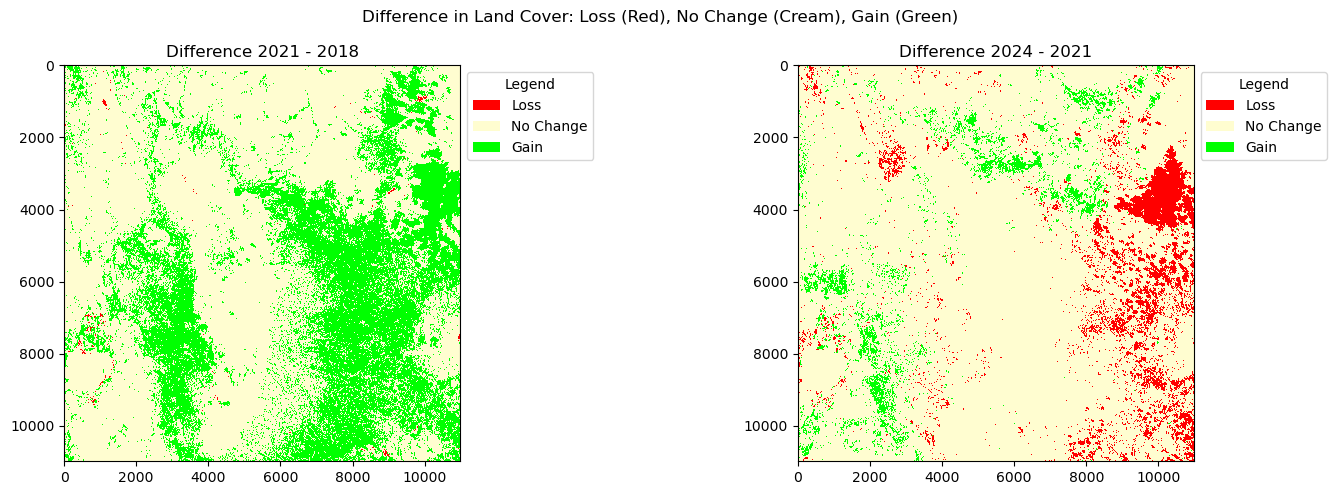

In [8]:
def calculate_difference(image1_path, image2_path, output_path):
    # Opene the first image
    with rasterio.open(image1_path) as src1:
        image1 = src1.read(1)
    
    # Open the second image
    with rasterio.open(image2_path) as src2:
        image2 = src2.read(1)
    
    # Calculate the difference
    difference = image2 - image1
    
    # Save the difference images
    meta = src1.meta.copy()
    meta.update(dtype=rasterio.int8, count=1)
    
    with rasterio.open(output_path, 'w', **meta) as dst:
        dst.write(difference.astype(rasterio.int8), 1)
     
    print(f"Difference image saved to {output_path}")
    return difference

def display_difference_images(image_files, titles):
    # Define the colors for the difference image (negative: red, zero: cream, positive: green)
    cmap = ListedColormap(['#FF0000', '#FFFDD0', '#00FF00'])

    # Create a subplot grid
    fig, axs = plt.subplots(1, len(image_files), figsize=(15, 5))

    for i, file_path in enumerate(image_files):
        # Open the difference image file
        with rasterio.open(file_path) as src:
        # Read the data from the TIFF files        
            difference_image = src.read(1)
        
        # Display the image
        ax = axs[i]
        im = ax.imshow(difference_image, cmap=cmap, vmin=-1, vmax=1)
        ax.set_title(titles[i])
        ax.axis('on')

    
        # Add a legend
        legend_labels = [Patch(facecolor='#FF0000', label='Loss'),
                         Patch(facecolor='#FFFDD0', label='No Change'),
                         Patch(facecolor='#00FF00', label='Gain')]
        ax.legend(handles=legend_labels, loc='upper left', bbox_to_anchor=(1, 1), title='Legend')

    plt.suptitle('Difference in Land Cover: Loss (Red), No Change (Cream), Gain (Green)')
    plt.tight_layout()
    plt.savefig(output_path)
    plt.show()

# Define the paths to the binary image files
image_2018 = 'data_raw/output/2018_binary_forest.tif'
image_2021 = 'data_raw/output/2021_binary_forest.tif'
image_2024 = 'data_raw/output/2024_binary_forest.tif'

# Define the output paths for the difference images
diff_2021_2018 = 'data_raw/output/diff_2021_2018_forest.tiff'
diff_2024_2021 = 'data_raw/output/diff_2024_2021_forest.tiff'

# Calculate the differences
difference_2021_2018 = calculate_difference(image_2018, image_2021, diff_2021_2018)
difference_2024_2021 = calculate_difference(image_2021, image_2024, diff_2024_2021)

# Define the paths to the difference image files and their titles
difference_image_files = [diff_2021_2018, diff_2024_2021]
titles = ['Difference 2021 - 2018', 'Difference 2024 - 2021']

output_path='data_raw/output/forest_loss_gain.png'

# Display the difference images
display_difference_images(difference_image_files, titles)

### Calculating the zonal statistics using the difference images

Pixel statistics for 2021 - 2018 difference image:
{'loss_pixels': 1182536, 'gain_pixels': 29713793, 'loss_area_ha': 11825.36, 'gain_area_ha': 297137.93}
Pixel statistics for 2024 - 2021 difference image:
{'loss_pixels': 13992613, 'gain_pixels': 9128404, 'loss_area_ha': 139926.13, 'gain_area_ha': 91284.04000000001}


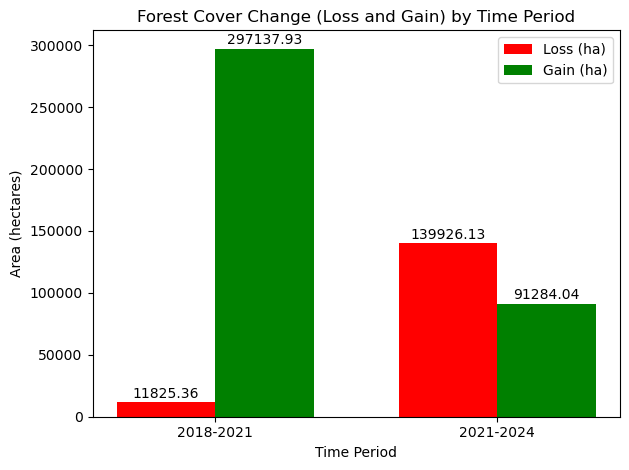

In [9]:
def calculate_pixel_statistics(difference_image, pixel_area_hectares):
    loss_pixels = np.sum(difference_image == -1)  # the Pixels representing forest loss
    gain_pixels = np.sum(difference_image == 1)   # the Pixels representing forest gain

    loss_area_ha = loss_pixels * pixel_area_hectares
    gain_area_ha = gain_pixels * pixel_area_hectares

    return {
        "loss_pixels": loss_pixels,
        "gain_pixels": gain_pixels,
        "loss_area_ha": loss_area_ha,
        "gain_area_ha": gain_area_ha
    }

# Define the paths to the difference image files
diff_2021_2018 = 'data_raw/output/diff_2021_2018.tiff'
diff_2024_2021 = 'data_raw/output/diff_2024_2021.tiff'
output_path='data_raw/output/forest_loss_gain_bar_graph.png'
# Define the area of one pixel in hectares
pixel_area_hectares = (10 * 10) / 10000  # 1 hectare = 10,000 square meters

# Calculate and print pixel statistics for each difference image
with rasterio.open(diff_2021_2018) as src:
    difference_image_2021_2018 = src.read(1)
stats_2021_2018 = calculate_pixel_statistics(difference_image_2021_2018, pixel_area_hectares)

with rasterio.open(diff_2024_2021) as src:
    difference_image_2024_2021 = src.read(1)
stats_2024_2021 = calculate_pixel_statistics(difference_image_2024_2021, pixel_area_hectares)

print("Pixel statistics for 2021 - 2018 difference image:")
print(stats_2021_2018)

print("Pixel statistics for 2024 - 2021 difference image:")
print(stats_2024_2021)

# Prepare the data for the bar graph
labels = ['2018-2021', '2021-2024']
loss_areas = [stats_2021_2018["loss_area_ha"], stats_2024_2021["loss_area_ha"]]
gain_areas = [stats_2021_2018["gain_area_ha"], stats_2024_2021["gain_area_ha"]]

x = np.arange(len(labels))  # define the label locations
width = 0.35  # define the width of the bars

fig, ax = plt.subplots()
bars1 = ax.bar(x - width/2, loss_areas, width, label='Loss (ha)', color='red')
bars2 = ax.bar(x + width/2, gain_areas, width, label='Gain (ha)', color='green')

# Add labels.
ax.set_xlabel('Time Period')
ax.set_ylabel('Area (hectares)')
ax.set_title('Forest Cover Change (Loss and Gain) by Time Period')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

# Attach a text label above each bar.
def autolabel(bars):
    """Attach a text label above each bar in bars, displaying its height."""
    for bar in bars:
        height = bar.get_height()
        ax.annotate('{}'.format(round(height, 2)),
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 1),  # 1 point vertical offset i.e position the value just above the bar
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(bars1)
autolabel(bars2)

fig.tight_layout()
plt.savefig(output_path)
plt.show()

### Air Quality Analysis

The air quality analysis was done by obtaining the images from Google Earth Engine , this is because the Sentinel 5P data comes in netcdf format which can be difficult to navigate. GEE also allows one to compute mean images from the image collection allowing one to get a complete image for their area of interest. The images were therefore prepared using GEE and uploaded into the dunia platform,this __[Google Earth Engine Script](https://code.earthengine.google.com/9ca615dd59e03c498827a33021f66f3b)__ shows how you can also do the same for your area of interest.

The Nitrogen Dioxide(NO2) data is given in mols per square meter

C:\Users\user\AppData\Local\Temp\ipykernel_15568\124101112.py:31: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 0.9, 1])  # Adjust the right margin to accommodate the colorbar


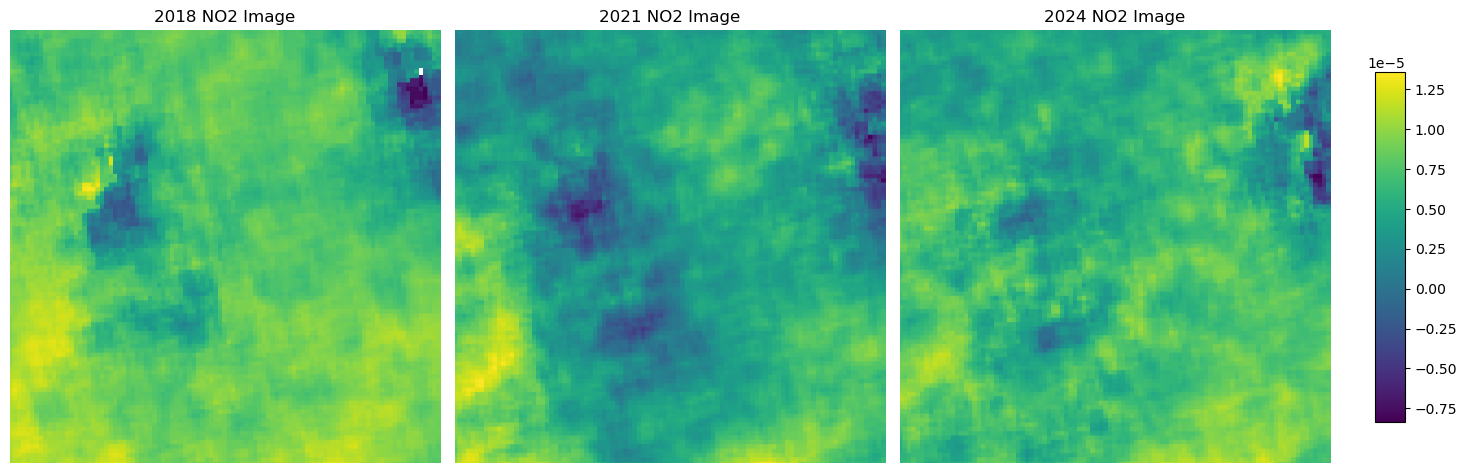

In [10]:
def plot_no2_images_horizontally(years, input_dir):
    # Set up the plot and determine the number of subplots based on the number of years
    fig, axs = plt.subplots(1, len(years), figsize=(15, 5))  # Adjust the figsize as needed

    for idx, year in enumerate(years):
        input_tiff = os.path.join(input_dir, f'S5P_NO2_{year}_2.tif')
        
        if os.path.exists(input_tiff):
            try:
                # Open the TIFF files using rasterio
                with rasterio.open(input_tiff) as src:
                    # Read the data 
                    data = src.read(1)
                    
                    # Plot the image in the respective subplots
                    ax = axs[idx] if len(years) > 1 else axs
                    im = ax.imshow(data, cmap='viridis')
                    ax.set_title(f'{year} NO2 Image')
                    ax.set_xlabel('Pixel X Coordinates')
                    ax.set_ylabel('Pixel Y Coordinates')
                    ax.set_axis_off()

            except Exception as e:
                print(f"Failed to read or plot {input_tiff}: {e}")
        else:
            print(f"Input file for year {year} not found: {input_tiff}")
    
    # Add a colorbar to the figure
    cbar_ax = fig.add_axes([0.92, 0.15, 0.02, 0.7])  # x, y, width, height
    fig.colorbar(im, cax=cbar_ax)
    plt.tight_layout(rect=[0, 0, 0.9, 1])  # Adjust the right margin to accommodate the colorbar
    plt.savefig(output_path)
    plt.show()

# Define the years to process
years = [2018, 2021, 2024]

# Define the input directory containing the TIFF files
input_dir = 'data_raw/input'
output_path='data_raw/output/S5P_NO2_2.png'
# Plot the NO2 images horizontally i.e side by side
plot_no2_images_horizontally(years, input_dir)


Performing differences on the Nitrogen Dioxide(NO2) distribution images
===


C:\Users\user\AppData\Local\Temp\ipykernel_15568\3650598910.py:35: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


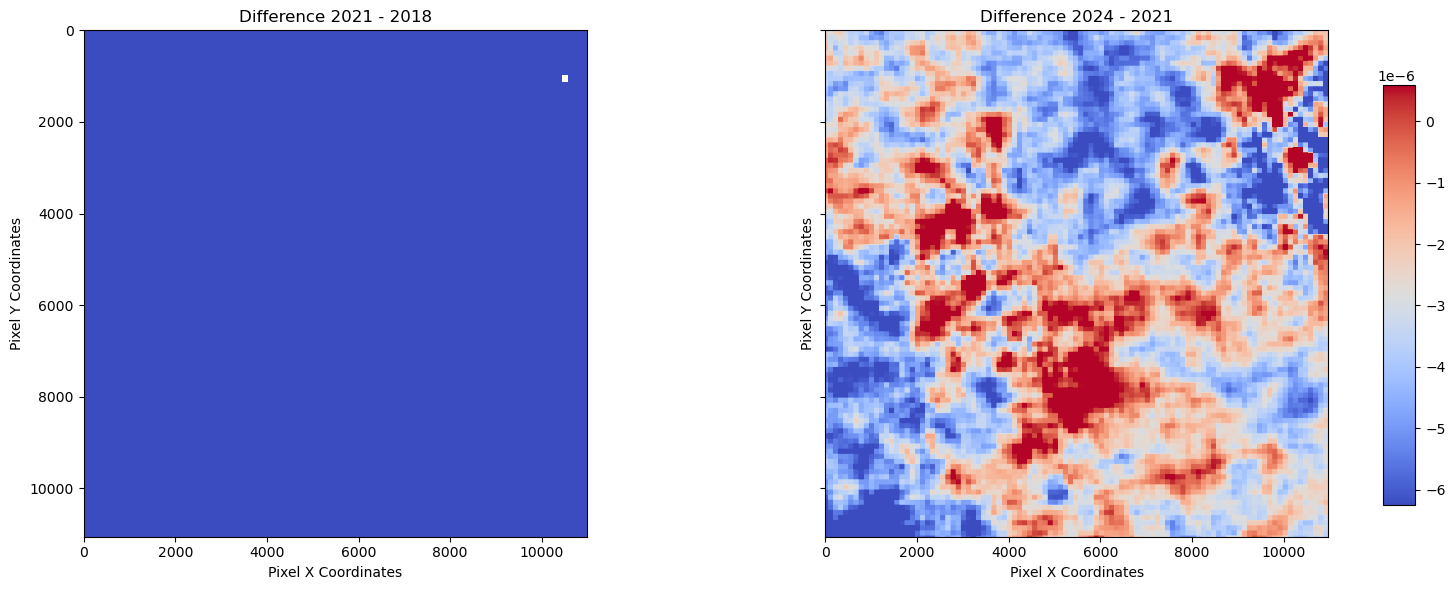

In [11]:
def calculate_and_plot_difference(input_dir, years):
    images = {}
    # Checking and storing the  data for each year
    for year in years:
        input_tiff = os.path.join(input_dir, f'S5P_NO2_{year}_2.tif')
        if os.path.exists(input_tiff):
            with rasterio.open(input_tiff) as src:
                images[year] = src.read(1)
        else:
            print(f"Input file for year {year} not found: {input_tiff}")
            continue  # Continue with other years if one is missing

    num_differences = len(years) - 1
    if num_differences > 0:
        # Setting up the subplot grid
        fig, axs = plt.subplots(1, num_differences, figsize=(8 * num_differences, 6), sharey=True)

        # Computing and plotting differences between the consecutive years
        for i in range(num_differences):
            year1, year2 = years[i], years[i+1]
            if year1 in images and year2 in images:
                difference = images[year2] - images[year1]

                # Accessing the correct subplot for each difference
                ax = axs[i] if num_differences > 1 else axs 
                im = ax.imshow(difference, cmap='coolwarm', vmin=np.percentile(difference, 5), vmax=np.percentile(difference, 95))
                ax.set_title(f'Difference {year2} - {year1}')
                ax.set_xlabel('Pixel X Coordinates')
                ax.set_ylabel('Pixel Y Coordinates')
                
       # Creating an axes on the right side for the colorbar
        cbar_ax = fig.add_axes([0.93, 0.15, 0.02, 0.7])  # Adjusting these values to fit the layout
        fig.colorbar(im, cax=cbar_ax)
        plt.subplots_adjust(right=0.9)  # Adjusting the right margin to make space for the colorbar
        plt.tight_layout()
        plt.savefig(output_path)
        plt.show()

# Define the years to analyze
years = [2018, 2021, 2024]

# Define the input directory containing the TIFF files
input_dir = 'data_raw/input'
output_path='data_raw/output/S5P_NO2_differences_NO2.png'

# Calculate the differences and plotting them
calculate_and_plot_difference(input_dir, years)




#### Calculating the zonal statistics for each of the NO2 difference images to explain the differences in the apperance by checking the maximun and minimum values


In [12]:
#compute the statistics for 2021-2024

def load_image(path):
    """ Load an image using rasterio and return the first band as a numpy array. """
    with rasterio.open(path) as src:
        return src.read(1)  # Read the first band

def calculate_difference(image1_path, image2_path):
    """ Load two images, calculate the difference, and return the difference array. """
    image1 = load_image(image1_path)
    image2 = load_image(image2_path)
    return image2 - image1

# Specify the paths to the two raster images i.e the difference images for NO2
image1_path = 'data_raw/input/S5P_NO2_2021_2.tif'
image2_path = 'data_raw/input/S5P_NO2_2024_2.tif'

# Calculate  the differences
difference1 = calculate_difference(image1_path, image2_path)

# Print the statistics of the difference
print("Minimum difference:", np.min(difference1))
print("Maximum difference:", np.max(difference1))
print("Unique values in difference:", np.unique(difference1))


Minimum difference: -1.1647081835849036e-05
Maximum difference: 8.275834755290778e-06
Unique values in difference: [-1.16470818e-05 -1.12897314e-05 -1.07684626e-05 ...  7.00230831e-06
  7.06030413e-06  8.27583476e-06]


In [13]:
#compute the statistics for 2018-2021

def load_image(path):
    """ Load an image using rasterio and return the first band as a numpy array. """
    with rasterio.open(path) as src:
        return src.read(1)  # Read the first band

def calculate_difference(image1_path, image2_path):
    """ Load two images, calculate the difference, and return the difference array. """
    image1 = load_image(image1_path)
    image2 = load_image(image2_path)
    return image2 - image1

# Specify the paths to the two raster images
image1_path = 'data_raw/input/S5P_NO2_2018_2.tif'
image2_path = 'data_raw/input/S5P_NO2_2021_2.tif'

# Calculate the differences
difference1 = calculate_difference(image1_path, image2_path)

# Print the statistics from the differences
print("Minimum difference:", np.min(difference1))
print("Maximum difference:", np.max(difference1))
print("Unique values in difference:", np.unique(difference1))


Minimum difference: nan
Maximum difference: nan
Unique values in difference: [-9.67067826e-06 -9.61701789e-06 -9.60113568e-06 ...  1.66973518e-05
  1.78403164e-05             nan]


From the above we see that the difference image obtained for the years 2021 and 2018 is very minimal causing the image to have the blue appearance.

The above analysis shows that from 2018 to 2021, forest cover increased significantly, leading to a decrease in atmospheric NO2 levels, whereas from 2021 to 2024, substantial forest loss, primarily due to forest fires, resulted in increased NO2 levels. These trends highlight the critical role of forest cover in regulating air quality. For more information check the _[summary report](https://drive.google.com/file/d/15HDutgJCF6Js0J965AOuadAtyeeOEf1G/view?usp=sharing)_
